In [1]:
# in this notebook we will generate chart to display memory usage by different simulation scenarios
# scenario_size = [1 rep per frame(fps, unityfps), 10,100,1000,10000,...]
scenario_32 = [(212.7,212.7),(2122,212.2),(19700,197),(109500,109.5),(216000,21.6)]
scenario_1024 = [(196.7,196.7),(2181,218.1),(16030,160.3),(20900,20.9)]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def generate_chart(scenario_numbers, total_memory_values, time_to_spawn_values, yLabel1, yLabel2, xlabel,title, bar_width=0.4, figsize=(7, 5), total_memory_color='b', time_to_spawn_color='r', grid_alpha=0.0,fontSize=8, yLim=None):
    # Create a single line chart for memory usage
    # Make it logarithmic
    fig, ax1 = plt.subplots(figsize=figsize)

    # Set the x-axis ticks to be the scenario numbers
    index = np.arange(len(scenario_numbers))

    # Plot total memory on the primary y-axis
    bars1 = ax1.bar(index, total_memory_values, bar_width, color=total_memory_color)
    if yLim is not None:
        ax1.set_ylim(0,yLim)
    ax1.set_xlabel(xlabel)
    ax1.set_yscale('log')
    ax1.set_ylabel(yLabel1, color='black')
    ax1.tick_params(axis='y', colors='black')  # Set tick_params color to black
    ax1.set_xticks(index)
    ax1.set_xticklabels(scenario_numbers)
    ax1.set_title(title)
    
    #set ylim to 10% more than the max value
    ax1.set_ylim(1, np.max(total_memory_values) * 5)#multiplication because its log scale

    # Display the memory usage as values on top of each bar
    for bar in bars1:
        yval = bar.get_height()
        #clamp yval to ylim if it is greater than yLim and yLim is not None
        if yLim is not None and yval > yLim:
            yval = yLim *0.96
        #create text as scientific notation
        barValue=bar.get_height()
        textValue = '{:.2e}'.format(barValue)
        #add a line break before the e
        textValue = textValue.replace('e', '\ne')
        plt.text(bar.get_x() + bar.get_width()/2, yval, textValue, ha='center', va='bottom', color='black', fontsize=fontSize)

    # Set gridlines to black for the first subplot
    ax1.grid(True, linestyle='--', alpha=grid_alpha, color='black')

    # Create a second subplot for time to spawn
    ax2 = ax1.twinx()
    ax2.set_ylim(0, np.max(time_to_spawn_values) * 1.1)
    if yLim is not None:
        ax2.set_ylim(0,yLim)
    # Plot time to spawn on the secondary y-axis
    bars2 = ax2.bar(index + bar_width, time_to_spawn_values, bar_width, color=time_to_spawn_color)
    ax2.set_ylabel(yLabel2, color='black')
    ax2.tick_params(axis='y', color='black')  # Set tick_params color to black

    # Display the time to spawn as values on top of each bar
    for bar in bars2:
        yval = bar.get_height()
        #clamp yval to ylim if it is greater than yLim and yLim is not None
        if yLim is not None and yval > yLim:
            yval = yLim *0.94
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(bar.get_height(),2), ha='center', va='bottom', color='black',fontsize=fontSize)

    # Set gridlines to black for the second subplot
    ax2.grid(True, linestyle='--', alpha=0, color='black')

    # Show the plot
    plt.show()


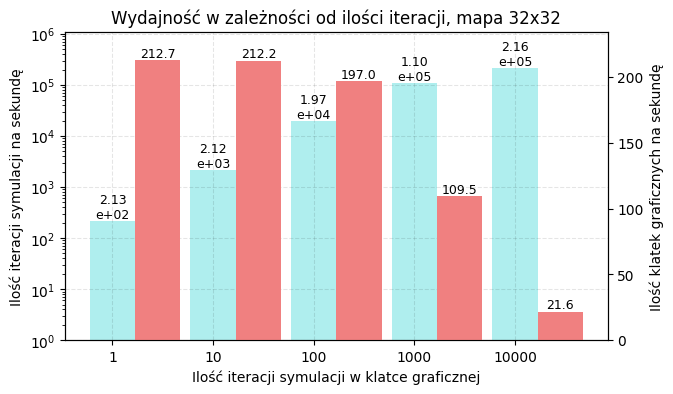

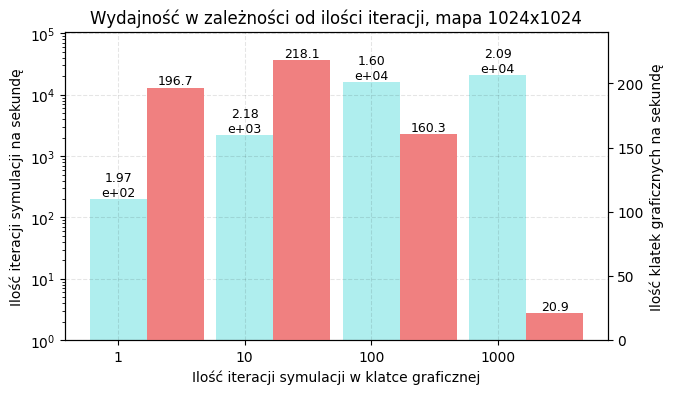

In [3]:
# since the texture memory and mesh memory does not change that much, we will only generate chart from total and time
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
scenario_no_32 = [1,10,100,1000,10000]
scenario_no_1024 = [1,10,100,1000]

# data to plot
n_groups = 7
s_32_fps = [fps for fps,unity_fps in scenario_32]
s_32_unity_fps = [unity_fps for fps,unity_fps in scenario_32]
s_1024_fps = [fps for fps,unity_fps in scenario_1024]
s_1024_unity_fps = [unity_fps for fps,unity_fps in scenario_1024]

generate_chart(scenario_no_32, s_32_fps, s_32_unity_fps, yLabel1='Ilość iteracji symulacji na sekundę', yLabel2='Ilość klatek graficznych na sekundę',xlabel='Ilość iteracji symulacji w klatce graficznej',title='Wydajność w zależności od ilości iteracji, mapa 32x32', bar_width=0.45, figsize=(7, 4), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=9)

generate_chart(scenario_no_1024, s_1024_fps, s_1024_unity_fps, yLabel1='Ilość iteracji symulacji na sekundę', yLabel2='Ilość klatek graficznych na sekundę',xlabel='Ilość iteracji symulacji w klatce graficznej',title='Wydajność w zależności od ilości iteracji, mapa 1024x1024', bar_width=0.45, figsize=(7, 4), total_memory_color='paleturquoise', time_to_spawn_color='lightcoral', grid_alpha=0.1,fontSize=9)